### Fer2013 data set 
[Dataset Kaggle](https://www.kaggle.com/datasets/deadskull7/fer2013/data)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import to_categorical


### Analisis y estudio

In [2]:
x = pd.read_csv('./data/fer2013.csv')

In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [4]:
x.shape

(35887, 3)

In [5]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
x.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


### Prepocesado y separación de datos

In [7]:
data = x.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


In [8]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
8287
3


In [9]:
x = np.array([list(map(int, pixels[ix].split())) for ix in range(pixels.shape[0])])



In [10]:
x

array([[ 70,  80,  82, ..., 106, 109,  82],
       [151, 150, 147, ..., 193, 183, 184],
       [231, 212, 156, ...,  88, 110, 152],
       ...,
       [ 17,  17,  16, ..., 154, 133, 113],
       [ 30,  28,  28, ...,  35,  30,  28],
       [ 19,  13,  14, ..., 189, 199, 201]])

In [11]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

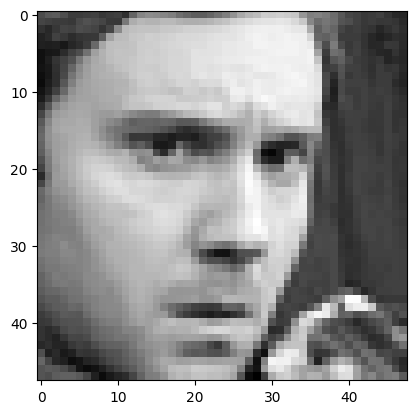

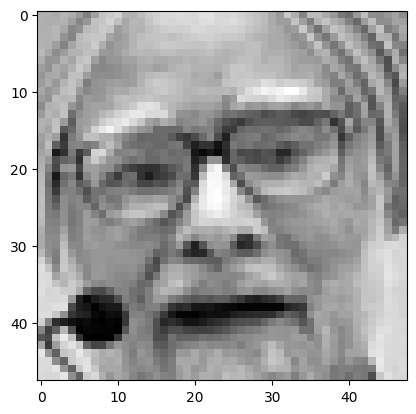

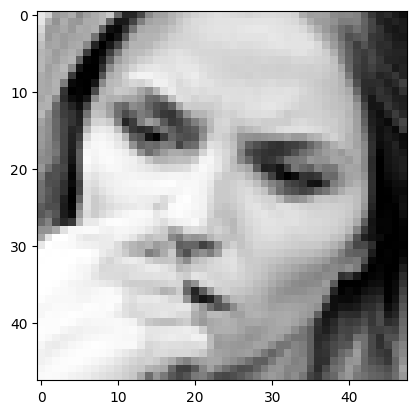

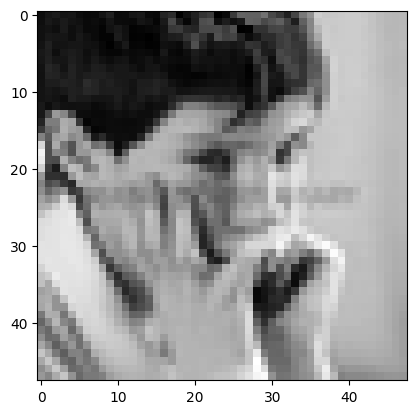

In [12]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [13]:
x = x / 255
x

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [14]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [15]:
X_train = X_train.reshape((X_train.shape[0], 1 , 48, 48 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0], 1 ,48, 48))

In [16]:
X_train.shape

(28710, 1, 48, 48)

In [17]:
from tensorflow.keras.utils import to_categorical
print (y.shape)
y_ = to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [18]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 1, 48, 48) (3590, 7)


### Entrenamiento 

In [19]:
X_train = X_train.reshape((X_train.shape[0], 48, 48, 1)) # me da un warning sin esto en algun lugar me equivoque con la separacion.

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [21]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K




In [23]:
model = Sequential()
batch_size = 128
epochs = 100

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(x) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [25]:
from tensorflow.keras import backend as K

# Definir Swish Activation
def swish_activation(x):
    return K.sigmoid(x) * x

# Reformatear X_train y X_crossval a (None, 48, 48, 1)
X_train = X_train.reshape(-1, 48, 48, 1)
X_crossval = X_crossval.reshape(-1, 48, 48, 1)

# Definir el modelo
model = Sequential()

# Cambiar input_shape a (48, 48, 1)
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="same", activation='relu'))  # Corregido
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))  # Corregido
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))  # Cambio de 'sigmoid' a 'softmax'

# Compilación con categorical_crossentropy para clasificación multiclase
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Mostrar resumen del modelo
print(model.summary())

# Entrenamiento con fit
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs=epochs, verbose=2)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 128)      │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,975 (2.04 MB)

 Trainable params: 535,975 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100


c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


224/224 - 28s - 125ms/step - accuracy: 0.2417 - loss: 1.8233 - val_accuracy: 0.2493 - val_loss: 1.7885 - learning_rate: 1.0000e-03
Epoch 2/100


c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


224/224 - 1s - 6ms/step - accuracy: 0.2969 - loss: 1.7661 - val_accuracy: 0.2493 - val_loss: 1.7869 - learning_rate: 1.0000e-03
Epoch 3/100
224/224 - 27s - 119ms/step - accuracy: 0.2742 - loss: 1.7544 - val_accuracy: 0.3418 - val_loss: 1.6573 - learning_rate: 1.0000e-03
Epoch 4/100
224/224 - 1s - 7ms/step - accuracy: 0.3750 - loss: 1.5981 - val_accuracy: 0.3490 - val_loss: 1.6652 - learning_rate: 1.0000e-03
Epoch 5/100
224/224 - 27s - 120ms/step - accuracy: 0.3667 - loss: 1.6052 - val_accuracy: 0.4153 - val_loss: 1.4818 - learning_rate: 1.0000e-03
Epoch 6/100
224/224 - 1s - 6ms/step - accuracy: 0.4844 - loss: 1.3955 - val_accuracy: 0.4198 - val_loss: 1.4750 - learning_rate: 1.0000e-03
Epoch 7/100
224/224 - 35s - 155ms/step - accuracy: 0.4306 - loss: 1.4712 - val_accuracy: 0.4813 - val_loss: 1.3401 - learning_rate: 1.0000e-03
Epoch 8/100
224/224 - 2s - 10ms/step - accuracy: 0.4062 - loss: 1.4907 - val_accuracy: 0.4825 - val_loss: 1.3415 - learning_rate: 1.0000e-03
Epoch 9/100
224/224 - 

In [26]:
weights = model.get_weights() 

In [27]:
model.save('fer2013_v2.h5')

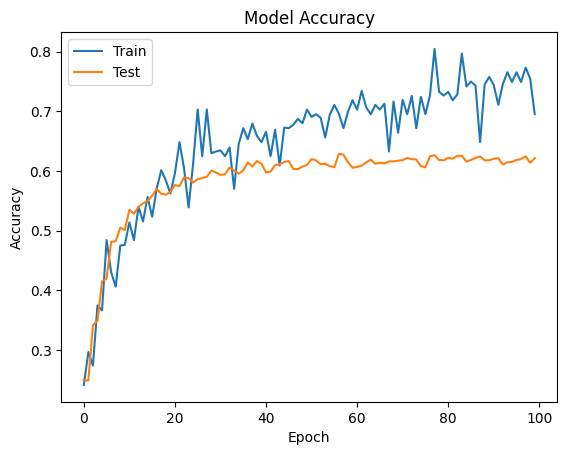

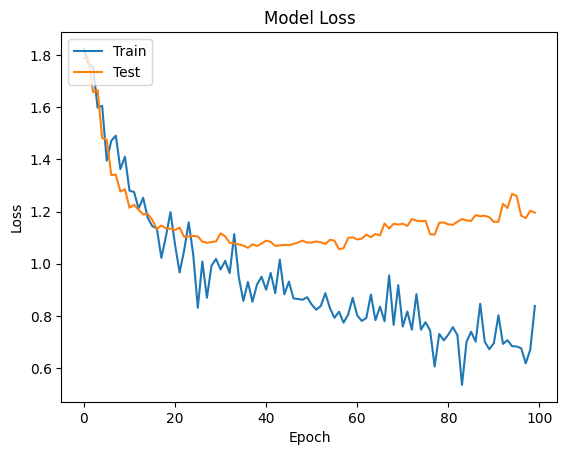

In [28]:
# Graficar precisión del modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Graficar pérdida del modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
